In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
dt = pd.read_csv('data/sales_data_filter.csv')
dt.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Gender_Index,Age_Group_Index
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,1,3
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,1,3
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1,0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1,0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,0,0


In [20]:
dt.shape

(104636, 20)

In [21]:
X = dt['Unit_Price'].values.reshape(-1,1)
y = dt['Unit_Cost'].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

Nilai M dan B

In [24]:
print(model_lr.coef_)
print(model_lr.intercept_)

[[0.58737603]]
[-1.55168037]


Akurasi prediksi

In [25]:
model_lr.score(X_test, y_test)

0.9939053796636685

In [26]:
model_lr.score(X_train, y_train)

0.9939349308912522

Hasil Prediksi Unit Price 2000

In [27]:
res = model_lr.predict([[2000]])
res[0][0]

1173.20038683214

In [28]:
y_pred = model_lr.predict(X_test)
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(results)

       Actual   Predicted
0           1    0.797824
1           2    1.385200
2           8   10.783216
3          13   19.006481
4           1   -0.376928
...       ...         ...
20923       9   13.132720
20924       1   -0.376928
20925     713  656.309477
20926       3    3.147328
20927       2    1.385200

[20928 rows x 2 columns]


Calculating the MAE, MSE and RMSE metrics.

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 14.65
Mean squared error: 980.98
Root mean squared error: 31.32


<AxesSubplot: >

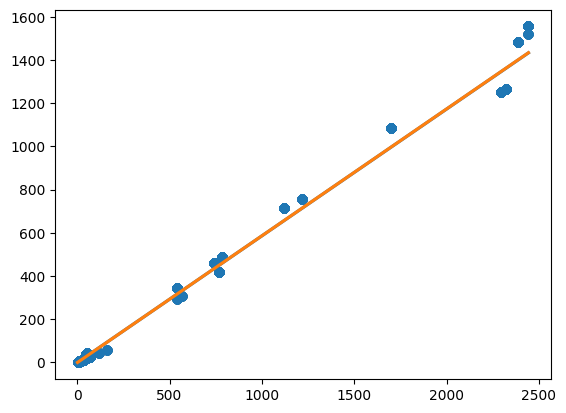

In [30]:
sns.regplot(x=X_test, y=y_test)
sns.regplot(x=X_test, y=y_pred, scatter=False)

## Linear Regression 2

In [31]:
dt2 = pd.read_csv('data/no_show_appointments.csv')
dt2.head()

,NomorPasien,NomorAppointment,JenisKelamin,TanggalPembuatan,TanggalAppointment,Umur,Daerah,Beasiswa,DarahTinggi,Diabetes,Alkohol,Disabled,SMS_received,No-show
0,2.143110e+13,5611376,F,2016-04-25T07:08:41Z,2016-05-25T00:00:00Z,43,Bidara Cina,0,0,0,0,0,1,No
1,2.839350e+13,5629135,M,2016-04-27T12:50:39Z,2016-04-29T00:00:00Z,78,Harapan Mulia,0,1,1,0,0,0,No
2,3.487580e+13,5686183,M,2016-05-11T12:18:24Z,2016-05-17T00:00:00Z,58,Cililitan,0,1,0,0,0,0,No
3,8.356730e+13,5729853,F,2016-05-24T07:54:37Z,2016-05-24T00:00:00Z,22,Cempaka Baru,0,0,0,0,0,0,No
4,9.186880e+14,5690145,F,2016-05-12T09:34:57Z,2016-05-12T00:00:00Z,30,Cijantung,0,0,0,0,0,0,No


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
dt2['Label'] = le.fit_transform(dt2['No-show'])

In [43]:
columns = ['Umur','Beasiswa', 'DarahTinggi','Diabetes','Alkohol','Disabled','SMS_received']

X2 = dt2[columns]
y2 = dt2['Label']
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [51]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size =0.23, random_state =12)

In [52]:
lr2 = LinearRegression()
model_lr2 = lr2.fit(X2_train, y2_train)

In [53]:
print(model_lr2.coef_)
print(model_lr2.intercept_)

[-0.02402045  0.00846062 -0.00235954  0.00359586  0.00264315  0.00099377
  0.04949175]
0.2019612043831401


In [54]:
model_lr2.score(X2_test, y2_test)

0.024483862525499167

In [55]:
y2_pred = model_lr2.predict(X2_test)
y2_pred

array([0.13361191, 0.1595967 , 0.17414819, ..., 0.18973907, 0.18594042,
       0.17934515])

In [56]:
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.32
Mean squared error: 0.16
Root mean squared error: 0.40


In [57]:
roc_auc_score(y2_test, y2_pred)

0.6067924570237405

Hasilnya jelek, coba ganti model lain

In [62]:
logr = LogisticRegression()
model_log = logr.fit(X2_train, y2_train)

In [64]:
model_log.score(X2_test, y2_test)

0.798166942018724

In [66]:
y3_pred = model_log.predict(X2_test)
y3_pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
roc_auc_score(y2_test, y3_pred)

0.5